In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
path = './input/'
filename = path + '001_vint_trace_27957.wav'

In [3]:
f = open(filename)
lines = f.read().splitlines()
f.close()
for i, line in enumerate(lines):
    if i < 10:
        print(i, line)

0 THIS IS A WAVELET LISTING
1 Header :   001 vint_trace_27957
2 Sample interval (msec) = 24
3 Number of samples      376
4 Index of time zero     1
5 1.5356692E+03 1.5356692E+03 1.5356692E+03 1.5356692E+03 1.5356692E+03 1.5356692E+03 
6 1.5356692E+03 1.5356692E+03 1.8573135E+03 1.9468926E+03 2.0360549E+03 2.1228533E+03 
7 2.2054456E+03 2.2823022E+03 2.3520679E+03 2.4136123E+03 2.4658582E+03 2.5081274E+03 
8 2.5567061E+03 2.5956733E+03 2.6254463E+03 2.6469285E+03 2.6612676E+03 2.6698186E+03 
9 2.6738682E+03 2.6746157E+03 2.6730513E+03 2.6699751E+03 2.6659429E+03 2.6614238E+03 


In [4]:
df_raw = pd.DataFrame()

In [5]:
column_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6']

In [6]:
rowstoskip = 5
sample_rate = 24

In [7]:
df_raw = pd.read_csv(filename, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
#df_raw = pd.read_csv(filename, names=column_names, skiprows=rowstoskip, delim_whitespace=True)

In [8]:
df_stacked = df_raw.stack().reset_index()

In [9]:
df_stacked = df_stacked.drop(['level_0', 'level_1'], axis=1)

In [10]:
df_stacked.columns = ['Vp']

In [11]:
df_raw = df_stacked

In [12]:
df_raw['delta TWT'] = sample_rate

In [13]:
df_raw.loc[0, 'delta TWT'] = 0

In [14]:
#df_raw

In [15]:
df_raw['TWT'] = df_raw['delta TWT'].cumsum(axis=0)

In [16]:
df_raw['delta Depth'] = df_raw['Vp'] * df_raw['delta TWT'] / 2000

In [17]:
df_raw['Depth'] = df_raw['delta Depth'].cumsum(axis=0)

In [48]:
df_raw['Mean Vp'] = df_raw[df_raw['Depth'] < 128]['Vp'].mean()

In [57]:
df_horizons[df_horizons['X_km'] == 710.0]

,X_km,Z_floor,File
801,710.0,77,000_SF
796,710.0,579,065_BTRT
808,710.0,752,090_TTUR
807,710.0,1356,160_TJUR
548,710.0,1866,200_BED
802,710.0,2567,210_SOL
803,710.0,3019,230_T_CROSS
803,710.0,4930,255_D_PERM


In [62]:
df_raw.loc[df_raw['Depth'] < 128, 'Mean Vp'] = df_raw[df_raw['Depth'] < 128]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 128) & (df_raw['Depth'] <= 579), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 128) & (df_raw['Depth'] <= 579)]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 579) & (df_raw['Depth'] <= 752), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 579) & (df_raw['Depth'] <= 752)]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 752) & (df_raw['Depth'] <= 1356), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 752) & (df_raw['Depth'] <= 1356)]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 1356) & (df_raw['Depth'] <= 1866), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 1356) & (df_raw['Depth'] <= 1866)]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 1866) & (df_raw['Depth'] <= 2567), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 1866) & (df_raw['Depth'] <= 2567)]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 2567) & (df_raw['Depth'] <= 3019), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 2567) & (df_raw['Depth'] <= 3019)]['Vp'].mean()
df_raw.loc[(df_raw['Depth'] > 3019) & (df_raw['Depth'] <= 4930), 'Mean Vp'] = df_raw[(df_raw['Depth'] > 3019) & (df_raw['Depth'] <= 4930)]['Vp'].mean()
df_raw.loc[df_raw['Depth'] > 4930, 'Mean Vp'] = df_raw[df_raw['Depth'] > 128]['Vp'].mean()

In [63]:
df_raw

,Vp,delta TWT,TWT,delta Depth,Depth,Mean Vp
0,1535.6692,0,0,0.000000,0.000000,1535.669200
1,1535.6692,24,24,18.428030,18.428030,1535.669200
2,1535.6692,24,48,18.428030,36.856061,1535.669200
3,1535.6692,24,72,18.428030,55.284091,1535.669200
4,1535.6692,24,96,18.428030,73.712122,1535.669200
5,1535.6692,24,120,18.428030,92.140152,1535.669200
6,1535.6692,24,144,18.428030,110.568182,1535.669200
7,1535.6692,24,168,18.428030,128.996213,2300.763681
8,1857.3135,24,192,22.287762,151.283975,2300.763681
9,1946.8926,24,216,23.362711,174.646686,2300.763681


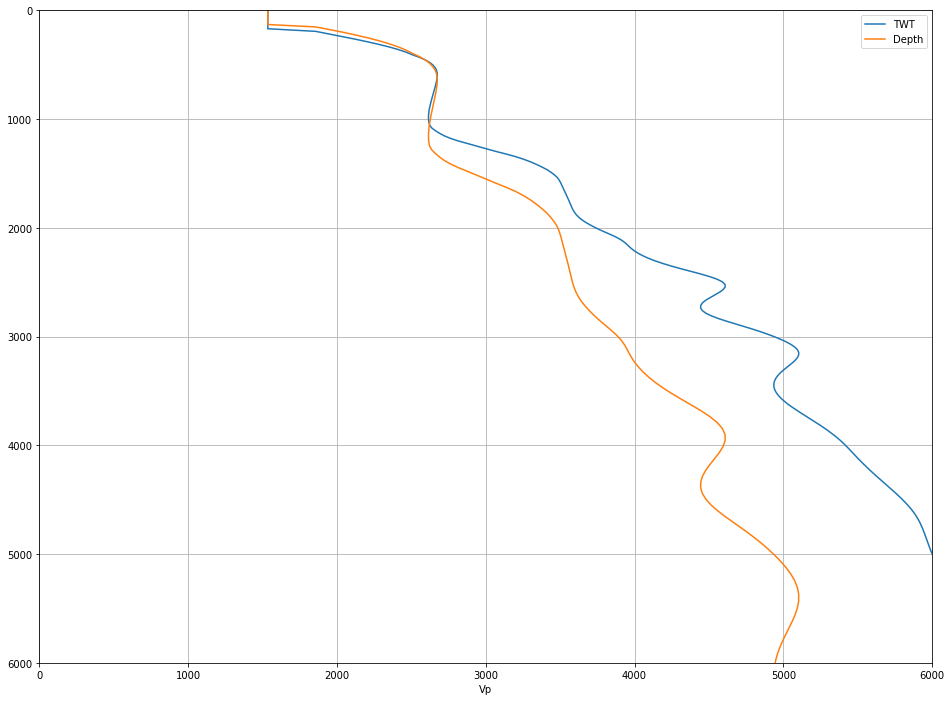

In [19]:
df_raw.plot(x='Vp', y=['TWT', 'Depth'], figsize=(16, 12), grid=True, ylim=(6000, 0), xlim=(0, 6000) );
#df_raw.plot(x='Vp', y='Depth', figsize=(16, 12), grid=True)

In [20]:
filename_000 = path + '000_SF.txt'
filename_065 = path + '065_BTRT.txt'
filename_090 = path + '090_TTUR.txt'
filename_160 = path + '160_TJUR.txt'
filename_200 = path + '200_BED.txt'
filename_210 = path + '210_SOL.txt'
filename_230 = path + '230_T_COSS.txt'
filename_255 = path + '255_D_PERM.txt'

In [21]:
df_raw_000 = pd.DataFrame()
df_raw_065 = pd.DataFrame()
df_raw_090 = pd.DataFrame()
df_raw_160 = pd.DataFrame()
df_raw_200 = pd.DataFrame()
df_raw_210 = pd.DataFrame()
df_raw_230 = pd.DataFrame()
df_raw_255 = pd.DataFrame()


In [22]:
df_raw_000 = pd.read_csv(filename_000, delim_whitespace=True)
df_raw_065 = pd.read_csv(filename_065, delim_whitespace=True)
df_raw_090 = pd.read_csv(filename_090, delim_whitespace=True)
df_raw_160 = pd.read_csv(filename_160, delim_whitespace=True)
df_raw_200 = pd.read_csv(filename_200, delim_whitespace=True)
df_raw_210 = pd.read_csv(filename_210, delim_whitespace=True)
df_raw_230 = pd.read_csv(filename_230, delim_whitespace=True)
df_raw_255 = pd.read_csv(filename_255, delim_whitespace=True)

In [23]:
df_raw_000['File'] = '000_SF'
df_raw_065['File'] = '065_BTRT'
df_raw_090['File'] = '090_TTUR'
df_raw_160['File'] = '160_TJUR'
df_raw_200['File'] = '200_BED'
df_raw_210['File'] = '210_SOL'
df_raw_230['File'] = '230_T_CROSS'
df_raw_255['File'] = '255_D_PERM'

In [24]:
#df_raw_000

In [25]:
df_horizons = pd.concat([df_raw_000, df_raw_065, df_raw_090, df_raw_160, df_raw_200, df_raw_210, df_raw_230, df_raw_255])

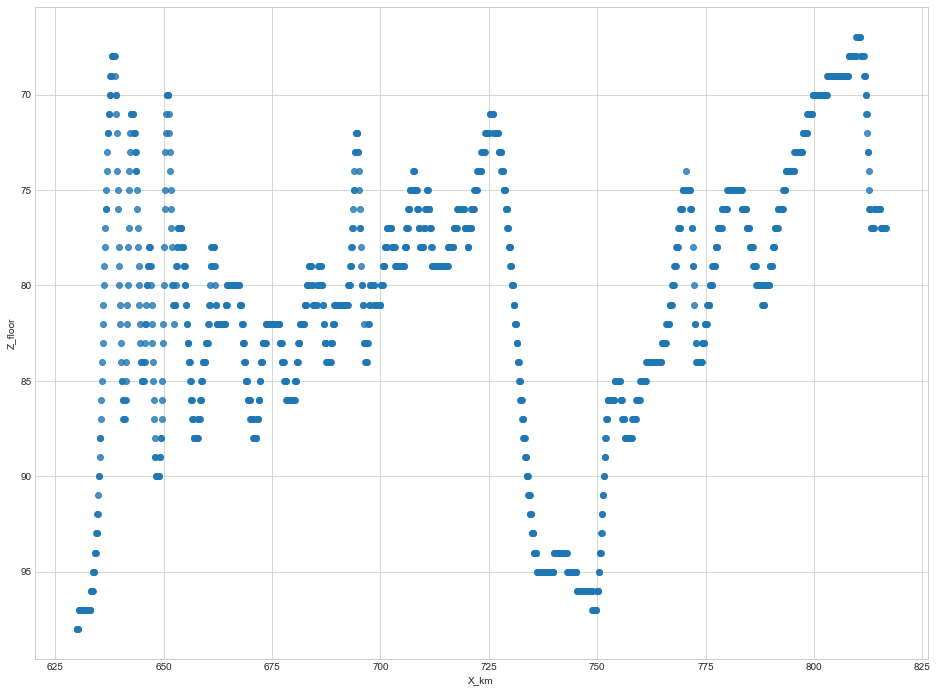

In [30]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
plt.gca().invert_yaxis()
sns.regplot(x='X_km', y='Z_floor', data=df_raw_000, fit_reg=False);

In [27]:
df_horizons[df_horizons['X_km'] == 710.0]

,X_km,Z_floor,File
801,710.0,77,000_SF
796,710.0,579,065_BTRT
808,710.0,752,090_TTUR
807,710.0,1356,160_TJUR
548,710.0,1866,200_BED
802,710.0,2567,210_SOL
803,710.0,3019,230_T_CROSS
803,710.0,4930,255_D_PERM


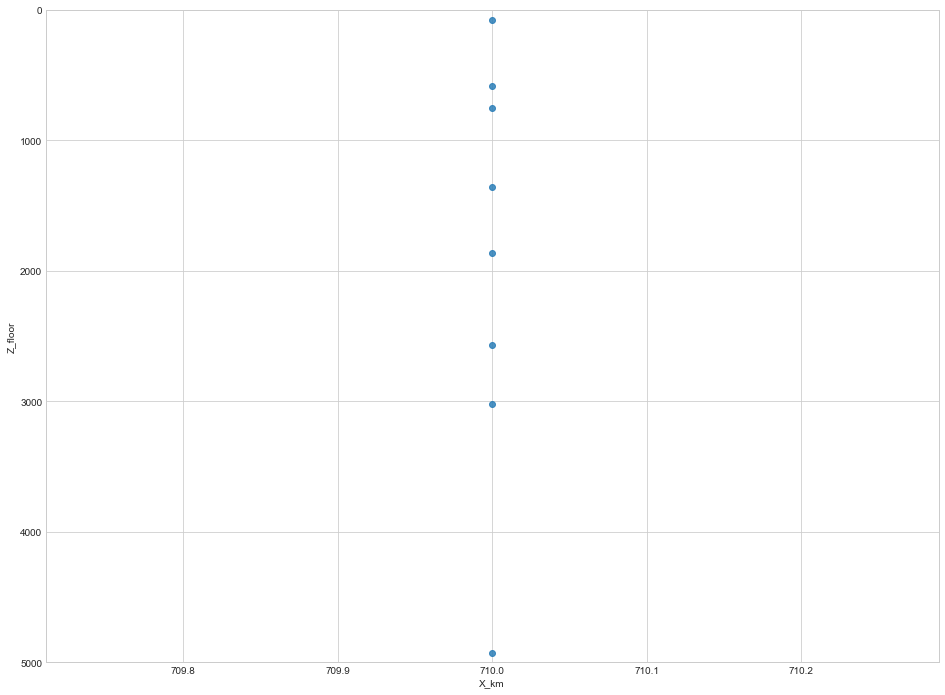

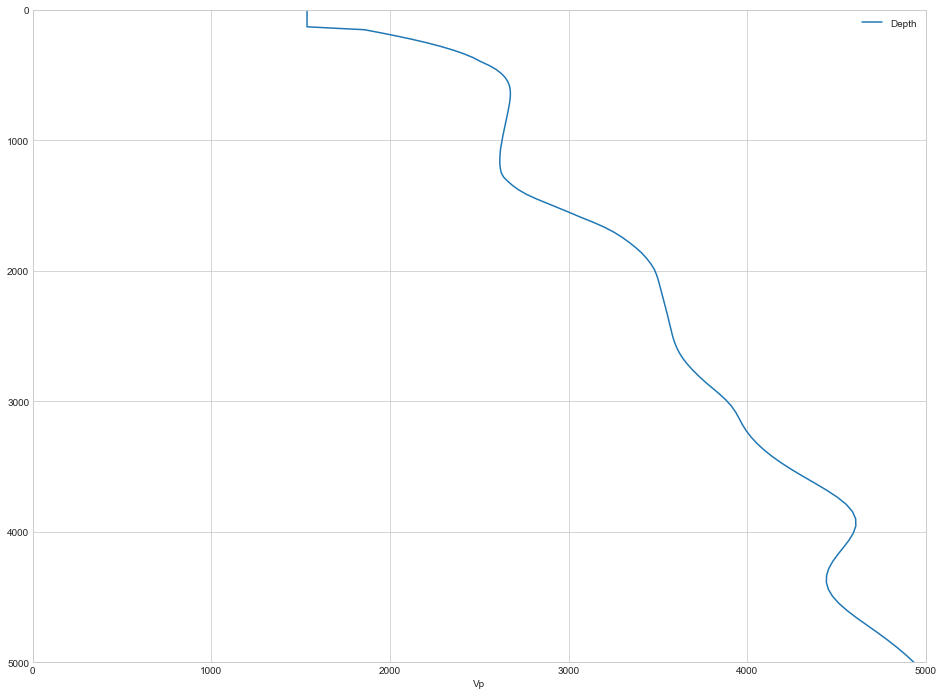

In [39]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

plt.gca().invert_yaxis()
sns.regplot(x='X_km', y='Z_floor', data=df_horizons[df_horizons['X_km'] == 710.0], fit_reg=False)
plt.ylim(5000,0)

df_raw.plot(x='Vp', y='Depth', figsize=(16, 12), grid=True, ylim=(5000, 0), xlim=(0, 5000) );

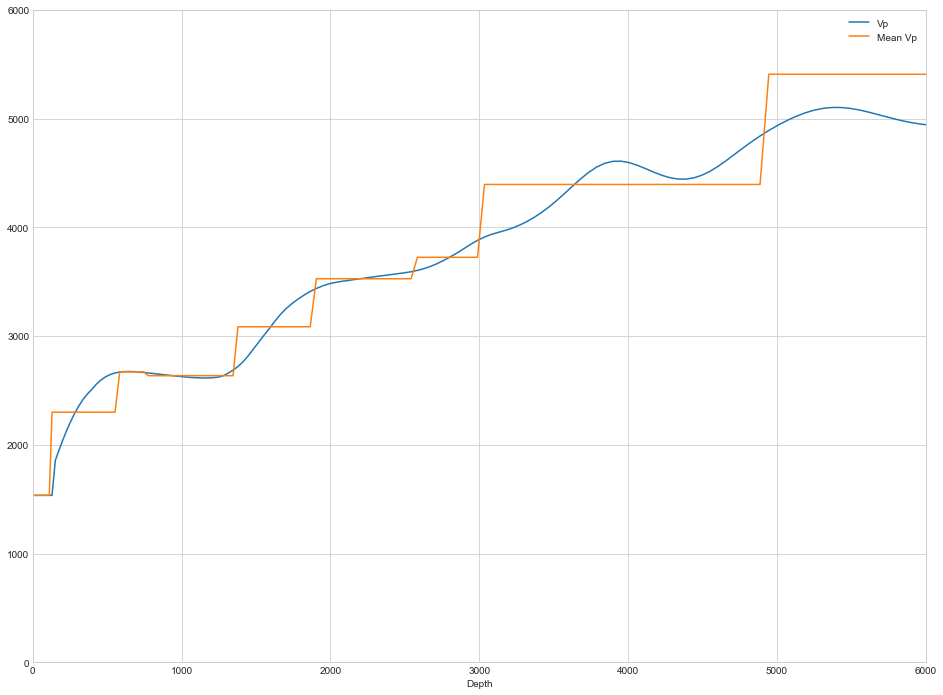

In [65]:
df_raw.plot(x='Depth', y=['Vp', 'Mean Vp'], figsize=(16, 12), grid=True, ylim=(0, 6000), xlim=(0, 6000) )

In [67]:
df_raw['Mean Vp'].values

array([1535.6692    , 1535.6692    , 1535.6692    , 1535.6692    ,
       1535.6692    , 1535.6692    , 1535.6692    , 2300.76368125,
       2300.76368125, 2300.76368125, 2300.76368125, 2300.76368125,
       2300.76368125, 2300.76368125, 2300.76368125, 2300.76368125,
       2300.76368125, 2300.76368125, 2300.76368125, 2300.76368125,
       2300.76368125, 2300.76368125, 2300.76368125, 2671.21196667,
       2671.21196667, 2671.21196667, 2671.21196667, 2671.21196667,
       2671.21196667, 2636.21616316, 2636.21616316, 2636.21616316,
       2636.21616316, 2636.21616316, 2636.21616316, 2636.21616316,
       2636.21616316, 2636.21616316, 2636.21616316, 2636.21616316,
       2636.21616316, 2636.21616316, 2636.21616316, 2636.21616316,
       2636.21616316, 2636.21616316, 2636.21616316, 2636.21616316,
       3086.3721    , 3086.3721    , 3086.3721    , 3086.3721    ,
       3086.3721    , 3086.3721    , 3086.3721    , 3086.3721    ,
       3086.3721    , 3086.3721    , 3086.3721    , 3086.3721 